# pytorch nn 🔦
---

In [2]:
import os
import torch
from torch import nn                            # 신경망 모듈
from torch.utils.data import DataLoader         # 데이터 로딩 관련 모듈
from torchvision import datasets, transforms  
from torchvision.transforms import ToTensor     # torch 저장소 데이터 셋 모듈

import matplotlib.pyplot as plt

In [12]:
from google.colab import drive
drive.mount('/content/drive')

colab_path = "/content/drive/MyDrive/Colab Notebooks"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## [1] 데이터 준비
---

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


## [2] NN 모델 생성
---

In [4]:
# 순차적인 Layer 구성 -> Sequential, Layer ...
class NeuralNetwork(nn.Module):
    # 생성자 메서드, NeuralNetwork()객체 생성 시 실행
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            # 입력층
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    # NN 모델이 동작을 시작할 때 실행
    def forward(self, x):
        # 1차원 변환
        x = self.flatten(x)
        # NN모델에 입력 데이터 전달
        logits = self.linear_relu_stack(x)
        return logits

In [6]:
# NN모델 생성
model_mnist = NeuralNetwork().to(device)

In [7]:
model_mnist.linear_relu_stack

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=10, bias=True)
)

In [8]:
# 데이터 준비
X = torch.rand(1, 28, 28, device=device)
# print(f"X -> {X}")

In [9]:
X.shape, X.ndim

(torch.Size([1, 28, 28]), 3)

In [10]:
# 학습
logits = model_mnist(X)

print(f"학습 결과 ---------------------\n{logits}, {logits.shape}")

학습 결과 ---------------------
tensor([[ 0.0517, -0.0426, -0.0392, -0.0757,  0.0938,  0.0150, -0.0545, -0.1099,
         -0.1287, -0.0331]], device='cuda:0', grad_fn=<AddmmBackward0>), torch.Size([1, 10])


In [11]:
# 결과 분석
pred_probab = nn.Softmax(dim=1)(logits)
print(f"pred_probab : {pred_probab}")

y_pred = pred_probab.argmax(1)
print(f"Prediction : {pred_probab.argmax()}")

pred_probab : tensor([[0.1085, 0.0988, 0.0991, 0.0955, 0.1132, 0.1046, 0.0976, 0.0923, 0.0906,
         0.0997]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Prediction : 4


## [3] pytorch 데이터 가져오기
---

In [13]:
from socketserver import ThreadingUnixStreamServer
from turtle import down


training_data = datasets.FashionMNIST(
    root=colab_path + "/Data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root=colab_path + "/Data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Colab Notebooks/Data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/Colab Notebooks/Data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Colab Notebooks/Data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/Colab Notebooks/Data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Colab Notebooks/Data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/Colab Notebooks/Data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Colab Notebooks/Data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/Colab Notebooks/Data/FashionMNIST/raw



In [14]:
type(training_data), type(test_data)

(torchvision.datasets.mnist.FashionMNIST,
 torchvision.datasets.mnist.FashionMNIST)

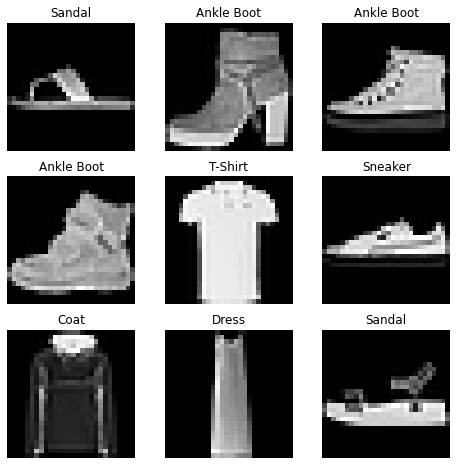

In [15]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()